In [232]:
#import useful packages
import pandas as pd #Pandas for dataframes
import geopandas as gpd #geopandas
import numpy as np #Numpy for numeric arrays and vector maths
import math #for mathematical operations like logarithm
import matplotlib.pylab as plt
#make sure python plots are embedded in the notebook
%matplotlib inline 

NYC Zip Code Boundaries: https://data.cityofnewyork.us/Business/Zip-Code-Boundaries/i8iw-xf4u ;
NYC Crash data :https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Crashes/h9gi-nx95

In [233]:
NYC=gpd.read_file('ZIP_CODE_040114/ZIP_CODE_040114.shp')
NYC.head()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.251871482 188138.3800067157,..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.712964058 186926.4395172149,..."
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.275535807 183696.33770971, 1..."
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.3654508889 183617.6128015518,..."
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.1134308875 176307.4958601296,..."


In [234]:
NYC['ZIPCODE']=NYC['ZIPCODE'].astype(int)

In [235]:
Crash=pd.read_csv('Motor_Vehicle_Collisions_-_Crashes.csv')
Crash.head()

,ACCIDENT DATE,ACCIDENT TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,03/13/2019,15:00,STATEN ISLAND,10306,40.576504,-74.103700,POINT (-74.1037 40.576504),HYLAN BOULEVARD,LINCOLN AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4096390,Sedan,Pick-up Truck,NaN,NaN,NaN
1,10/11/2018,19:10,NaN,NaN,NaN,NaN,NaN,BROOKLYN BATTERY TUNNEL,NaN,NaN,...,Unspecified,Unspecified,NaN,NaN,3998882,Station Wagon/Sport Utility Vehicle,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN
2,10/04/2018,17:10,NaN,NaN,40.817110,-73.892040,POINT (-73.89204 40.81711),TIFFANY STREET,NaN,NaN,...,Unspecified,NaN,NaN,NaN,3994611,Tractor Truck Diesel,Sedan,NaN,NaN,NaN
3,09/30/2018,12:03,NaN,NaN,40.845200,-73.916885,POINT (-73.916885 40.8452),CROSS BRONX EXPY,NaN,NaN,...,Unspecified,NaN,NaN,NaN,3991286,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
4,09/24/2018,19:42,MANHATTAN,10012,40.723510,-73.999790,POINT (-73.99979 40.72351),NaN,NaN,107 SPRING STREET,...,NaN,NaN,NaN,NaN,3987019,NaN,NaN,NaN,NaN,NaN


In [239]:
Crash.rename(columns={u'ZIP CODE':'ZIPCODE',u'ACCIDENT DATE' : 'ACCIDENT_DATE',u'COLLISION_ID':'COLLISION_ID'}, inplace=True)

In [241]:
Crash['ZIPCODE']=pd.to_numeric(Crash['ZIPCODE'], errors='coerce')
Crash['ZIPCODE']=Crash['ZIPCODE'].dropna().astype(int)
Crash.shape

(1601856, 29)

In [243]:
Crash1=Crash[['ZIPCODE','COLLISION_ID']].groupby(['ZIPCODE']).count().reset_index()
Crash1['COLLISION_ID'].sum()

1116050

In [245]:
Crash_Map=NYC.merge(Crash1,left_on='ZIPCODE', right_on='ZIPCODE', how='inner')
Crash_Map.head()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry,COLLISION_ID
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.251871482 188138.3800067157,...",2537
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.712964058 186926.4395172149,...",9851
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.275535807 183696.33770971, 1...",11988
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.3654508889 183617.6128015518,...",6700
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.1134308875 176307.4958601296,...",8256


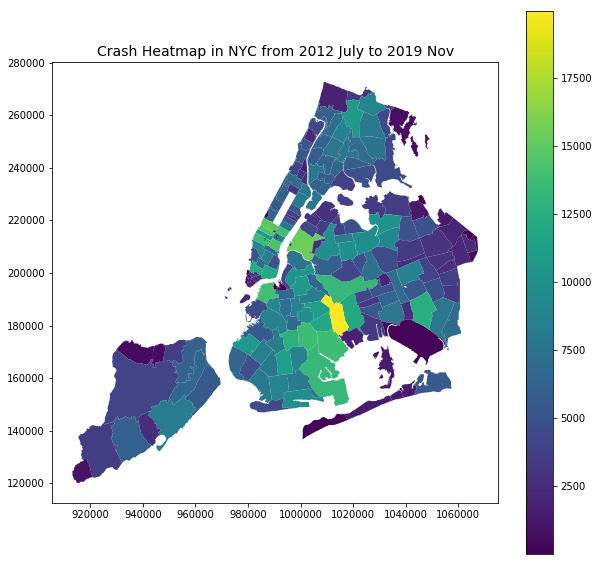

In [250]:
f, ax = plt.subplots(1, figsize=(10, 10))
ax.set_title("Crash Heatmap in NYC from 2012 July to 2019 Nov", fontsize=14)
Crash_Map.plot(axes=ax, column='COLLISION_ID', legend = True)